# Preliminary STEM Data Analysis

### For Meeting on 2/16/2017


## Write-up from 12/15/2016 Paper Proposal

1. Do STEM job descriptions contain more masculine words than non-STEM job descriptions?

    a. Does this dimension of job descriptions vary across:
        i. Discipline within STEM and nonSTEM jobs.
        ii. University, particularly on the dimension of rank.
        
    b.	Perhaps provide an appendix of the most commonly used words in each category among these job descriptions.
    
    c.	The basic descriptive comparison would look like this:
        * [graphic omitted - shows rows labeled "% feminine words" and "% masculine words" for STEM and non-STEM jobs, respectively.]
        
    d. Then we would consider constructing a descriptive Table such as this:
        * [graphic omitted - shows master rows for STEM and non-STEM, each sub-divided by subfield; columns are "Mean Masculine," "Mean Feminine," "% men from occupational data," "% men from our depart. data"


## Guidelines from MDC meeting with KT on 2/13/2017

#### Measures

* Number and percentage of male and female words in separate columns
* Type, token, Type-Token Ratio for all of job description

#### Analysis

* List of most common male and female words overall and by stem flag
* Plots of mean number of male/female words by STEM flag with SD
* Plots of percentage of male/female words by STEM flag with SD
* Context of most common male and female words in each STEM flag category

#### Future Analysis

* Breakdown by discipline within STEM/Non-STEM groups



In [1]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt

# read in appropriate data
# limit columns automatically to the relevant categories

recruit_datafile = pd.read_csv('../data/recruit_STEM2.csv',\
                           converters={'campus_id':str,'listing_department_id_1':str}, encoding = 'utf-8')#'iso-8859-1')

column_list = ['CASE_ID', 'campus_id', 'listing_department_id_1', 'dept_name', 'UCOP_STEM_flag',\
               'CIP_STEM_flag', 'STEM_SocSci_CIP_flag', 'description']

relevant_cols = [int(recruit_datafile.columns.get_loc(x)) for x in column_list]

recruit_data = pd.read_csv('../data/recruit_STEM2.csv',\
                           converters={'campus_id':str,'listing_department_id_1':str},\
                           index_col='CASE_ID', usecols = relevant_cols, encoding = 'utf-8')#'iso-8859-1')

# remove missing description cases

recruit_data = recruit_data.dropna(subset = ['description'])

print(recruit_data.describe())


       campus_id                                        description  \
count       1160                                               1160   
unique        10                                               1123   
top            9  The Haas School of Business at the University ...   
freq         177                                                  4   

       listing_department_id_1                       dept_name UCOP_STEM_flag  \
count                     1160                            1160            721   
unique                     247                             395              2   
top                          1  Paul Merage School of Business           STEM   
freq                        28                              20            407   

       CIP_STEM_flag STEM_SocSci_CIP_flag  
count           1098                 1098  
unique             2                    2  
top         Non-STEM             Non-STEM  
freq             683                  597  


In [2]:
# general stats - for all descriptions

# lower case, tokenize description and remove punctuation

recruit_data['descr_analysis'] = recruit_data['description'].apply(lambda x: str.lower(x))

recruit_data['descr_analysis'] = recruit_data['descr_analysis'].apply(lambda x: nltk.word_tokenize(x))

recruit_data['descr_analysis'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word not in list(string.punctuation)])

# print(recruit_data)
## need to add a line dealing with other exceptional cases being thrown, or solve encoding issue

# mean length of job description + var

recruit_data['descr_length'] = recruit_data['descr_analysis'].apply(len)
#print(recruit_data['descr_length'].mean()) # test code

# TTR of job descriptions + var

recruit_data['descr_unique'] = recruit_data['descr_analysis'].apply(set)
recruit_data['type_count'] = recruit_data['descr_unique'].apply(len)
recruit_data['TTR'] = recruit_data['type_count'] / recruit_data['descr_length']
# print(recruit_data['TTR'].mean()) # test code

print(recruit_data.describe())

# GROUPBY STATS FOR EACH CAMPUS
print('By campus:')
recruit_campus = recruit_data.groupby('campus_id')
print(recruit_campus.describe())
print()



       descr_length   type_count          TTR
count   1160.000000  1160.000000  1160.000000
mean     315.885345   172.567241     0.605499
std      222.301721    87.912178     0.114996
min        1.000000     1.000000     0.306283
25%      203.750000   127.000000     0.541320
50%      294.000000   172.000000     0.584302
75%      390.000000   213.000000     0.641009
max     2292.000000   702.000000     1.000000
By campus:
                        TTR  descr_length  type_count
campus_id                                            
1         count  143.000000    143.000000  143.000000
          mean     0.650597    266.258741  155.811189
          std      0.132282    161.163669   82.130174
          min      0.434132      1.000000    1.000000
          25%      0.580317    162.000000  105.000000
          50%      0.614865    267.000000  161.000000
          75%      0.676596    338.000000  208.000000
          max      1.000000    690.000000  359.000000
10        count   37.000000     37.

In [3]:
# gendered language analysis

# build masculine dictionary

masculine_words = ['active', 'adventurous', 'confident', 'decide', 'decisive',\
                  'dominant', 'greedy', 'headstrong', 'impulsive', 'logic', 'masculine',\
                  'objective', 'opinion', 'outspoken', 'persist', 'reckless',\
                  'stubborn', 'superior']

masculine_stems = ['aggress', 'ambitio', 'analy', 'assert', 'athlet', 'autonom',\
                  'boast', 'challeng', 'compet', 'courag', 'decision', 'determin',\
                  'domina', 'force', 'hierarch', 'hostil', 'independen', 'individual',\
                  'intellect', 'lead', 'principle', 'self-confiden', 'self-sufficien',\
                  'self-relian']

# grab words

recruit_data['masc_words'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word in masculine_words])

# grab word fragments

recruit_data['masc_stems0'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[0])])
recruit_data['masc_stems1'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[1])])
recruit_data['masc_stems2'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[2])])
recruit_data['masc_stems3'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[3])])
recruit_data['masc_stems4'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[4])])
recruit_data['masc_stems5'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[5])])
recruit_data['masc_stems6'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[6])])
recruit_data['masc_stems7'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[7])])
recruit_data['masc_stems8'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[8])])
recruit_data['masc_stems9'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[9])])
recruit_data['masc_stems10'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[10])])
recruit_data['masc_stems11'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[11])])
recruit_data['masc_stems12'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[12])])
recruit_data['masc_stems13'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[13])])
recruit_data['masc_stems14'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[14])])
recruit_data['masc_stems15'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[15])])
recruit_data['masc_stems16'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[16])])
recruit_data['masc_stems17'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[17])])
recruit_data['masc_stems18'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[18])])
recruit_data['masc_stems19'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[19])])
recruit_data['masc_stems20'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[20])])
recruit_data['masc_stems21'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[21])])
recruit_data['masc_stems22'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[22])])
recruit_data['masc_stems23'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[23])])

recruit_data['masc_stems'] = recruit_data['masc_stems0'] + recruit_data['masc_stems1'] + recruit_data['masc_stems2'] + recruit_data['masc_stems3']\
+ recruit_data['masc_stems4'] + recruit_data['masc_stems5'] + recruit_data['masc_stems6'] + recruit_data['masc_stems7'] + recruit_data['masc_stems8']\
+ recruit_data['masc_stems9'] + recruit_data['masc_stems10'] + recruit_data['masc_stems11'] + recruit_data['masc_stems12'] + recruit_data['masc_stems13']\
+ recruit_data['masc_stems14'] + recruit_data['masc_stems15'] + recruit_data['masc_stems16'] + recruit_data['masc_stems17'] + recruit_data['masc_stems18']\
+ recruit_data['masc_stems19'] + recruit_data['masc_stems20'] + recruit_data['masc_stems21'] + recruit_data['masc_stems22']\
+ recruit_data['masc_stems23']

recruit_data['masc_words_found'] = recruit_data['masc_stems'] + recruit_data['masc_words']
recruit_data['masc_words_num'] = recruit_data['masc_words_found'].apply(len)
recruit_data['masc_words_pro'] = recruit_data['masc_words_num'] / recruit_data['descr_length']

# mean # of masculine words in job description + var

print('Avg. masculine words per job description:', recruit_data['masc_words_num'].mean())
print('Std. Dev.:', recruit_data['masc_words_num'].std())
print()
print('Avg. proportion masculine words:', recruit_data['masc_words_pro'].mean())
print('Std. Dev.:', recruit_data['masc_words_pro'].std())
print()

# most common 10 masculine words in job descriptions

masc_common = recruit_data['masc_words_found'].tolist()
cat_masc_common = []
for i in range(0, len(masc_common)):
    cat_masc_common.extend(masc_common[i])
print('10 most frequent masculine words:', nltk.FreqDist(cat_masc_common).most_common()[:10])

Avg. masculine words per job description: 1.575
Std. Dev.: 1.831908484928417

Avg. proportion masculine words: 0.004693009319067983
Std. Dev.: 0.005482457244653419

10 most frequent masculine words: [('leadership', 380), ('individuals', 256), ('independent', 161), ('analysis', 155), ('active', 130), ('competitive', 98), ('individual', 96), ('leading', 82), ('intellectual', 61), ('lead', 60)]


In [4]:
# build feminine dictionary

feminine_words = ['affectionate', 'communal', 'considerate', 'feminine', 'flatterable',\
                 'gentle', 'honest', 'kind', 'kinship', 'modesty', 'nag', 'polite',\
                 'submissive']

feminine_stems = ['child', 'cheer', 'commit', 'compassion', 'connect', 'cooperat',\
                 'depend', 'emotiona', 'empath', 'interdependen', 'interpersona',\
                 'loyal', 'nurtur', 'pleasant', 'quiet', 'respon', 'sensitiv',\
                 'support', 'sympath', 'tender', 'together', 'trust', 'understand',\
                 'warm', 'whin', 'yield']

#print(len(feminine_stems))

# grab words

recruit_data['femi_words'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word in feminine_words])

# grab word fragments

recruit_data['femi_stems0'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[0])])
recruit_data['femi_stems1'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[1])])
recruit_data['femi_stems2'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[2])])
recruit_data['femi_stems3'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[3])])
recruit_data['femi_stems4'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[4])])
recruit_data['femi_stems5'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[5])])
recruit_data['femi_stems6'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[6])])
recruit_data['femi_stems7'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[7])])
recruit_data['femi_stems8'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[8])])
recruit_data['femi_stems9'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[9])])
recruit_data['femi_stems10'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[10])])
recruit_data['femi_stems11'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[11])])
recruit_data['femi_stems12'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[12])])
recruit_data['femi_stems13'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[13])])
recruit_data['femi_stems14'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[14])])
recruit_data['femi_stems15'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[15])])
recruit_data['femi_stems16'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[16])])
recruit_data['femi_stems17'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[17])])
recruit_data['femi_stems18'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[18])])
recruit_data['femi_stems19'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[19])])
recruit_data['femi_stems20'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[20])])
recruit_data['femi_stems21'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[21])])
recruit_data['femi_stems22'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[22])])
recruit_data['femi_stems23'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[23])])
recruit_data['femi_stems24'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[24])])
recruit_data['femi_stems25'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(feminine_stems[25])])

recruit_data['femi_stems'] = recruit_data['femi_stems0'] + recruit_data['femi_stems1'] + recruit_data['femi_stems2'] + recruit_data['femi_stems3']\
+ recruit_data['femi_stems4'] + recruit_data['femi_stems5'] + recruit_data['femi_stems6'] + recruit_data['femi_stems7'] + recruit_data['femi_stems8']\
+ recruit_data['femi_stems9'] + recruit_data['femi_stems10'] + recruit_data['femi_stems11'] + recruit_data['femi_stems12'] + recruit_data['femi_stems13']\
+ recruit_data['femi_stems14'] + recruit_data['femi_stems15'] + recruit_data['femi_stems16'] + recruit_data['femi_stems17'] + recruit_data['femi_stems18']\
+ recruit_data['femi_stems19'] + recruit_data['femi_stems20'] + recruit_data['femi_stems21'] + recruit_data['femi_stems22']\
+ recruit_data['femi_stems23'] + recruit_data['femi_stems24'] + recruit_data['femi_stems25']

# mean # of feminine words in job description + var

recruit_data['femi_words_found'] = recruit_data['femi_stems'] + recruit_data['femi_words']
recruit_data['femi_words_num'] = recruit_data['femi_words_found'].apply(len)
recruit_data['femi_words_pro'] = recruit_data['femi_words_num'] / recruit_data['descr_length']

# mean # of masculine words in job description + var

print('Avg. feminine words per job description:', recruit_data['femi_words_num'].mean())
print('Std. Dev.:', recruit_data['masc_words_num'].std())
print()
print('Avg. proportion feminine words:', recruit_data['femi_words_pro'].mean())
print('Std. Dev.:', recruit_data['femi_words_pro'].std())
print()

# most common 10 feminine words in job descriptions + context

femi_common = recruit_data['femi_words_found'].tolist()
cat_femi_common = []
for i in range(0, len(femi_common)):
    cat_femi_common.extend(femi_common[i])
print('10 most frequent feminine words:', nltk.FreqDist(cat_femi_common).most_common()[:10])

recruit_data.to_csv('../data/recruit_prelim.csv')


Avg. feminine words per job description: 2.3879310344827585
Std. Dev.: 1.831908484928417

Avg. proportion feminine words: 0.00690570804245192
Std. Dev.: 0.00603976073591206

10 most frequent feminine words: [('commitment', 589), ('committed', 490), ('committee', 330), ('support', 196), ('responsibilities', 172), ('understanding', 99), ('children', 94), ('supports', 76), ('responsible', 75), ('responsive', 54)]


                             TTR  descr_length  femi_words_num  \
UCOP_STEM_flag                                                   
NON-STEM       count  314.000000    314.000000      314.000000   
               mean     0.606995    303.098726        2.162420   
               std      0.096407    142.066964        1.821698   
               min      0.392019      5.000000        0.000000   
               25%      0.553892    225.750000        1.000000   
               50%      0.590755    296.000000        2.000000   
               75%      0.639390    377.750000        3.000000   
               max      1.000000   1115.000000       12.000000   
STEM           count  407.000000    407.000000      407.000000   
               mean     0.602895    293.776413        1.783784   
               std      0.094510    153.710773        1.765134   
               min      0.369176      1.000000        0.000000   
               25%      0.543862    192.000000        1.000000   
          

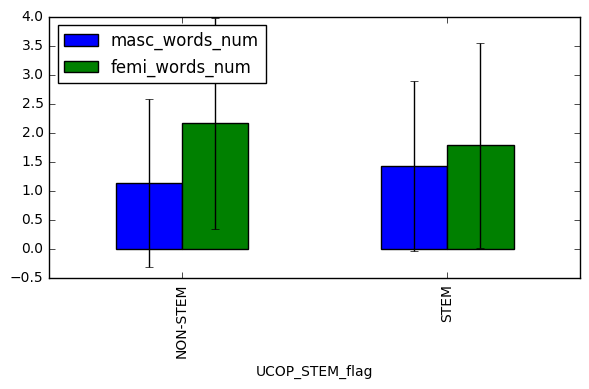


Description masculine and feminine proportions
                masc_words_pro  femi_words_pro
UCOP_STEM_flag                                
NON-STEM              0.003252        0.006947
STEM                  0.004826        0.005991
                masc_words_pro  femi_words_pro
UCOP_STEM_flag                                
NON-STEM              0.003763        0.005395
STEM                  0.004885        0.005724


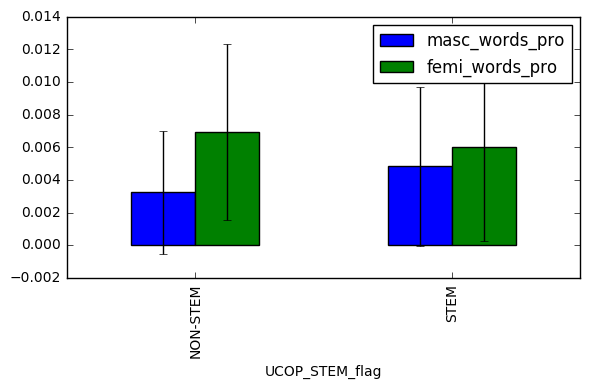


Description length
UCOP_STEM_flag
NON-STEM    303.098726
STEM        293.776413
Name: descr_length, dtype: float64
UCOP_STEM_flag
NON-STEM    142.066886
STEM        153.710767
Name: descr_length, dtype: float64


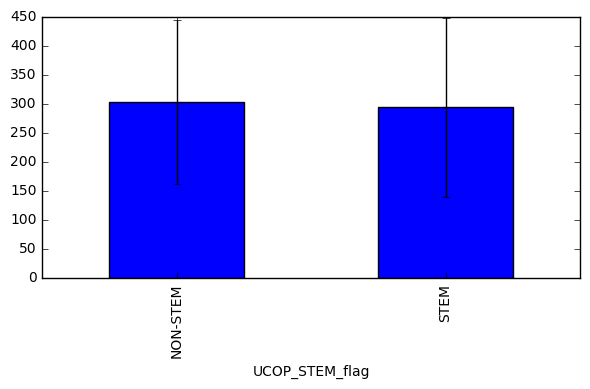


Description TTR
UCOP_STEM_flag
NON-STEM    0.606995
STEM        0.602895
Name: TTR, dtype: float64
UCOP_STEM_flag
NON-STEM    0.096407
STEM        0.094510
Name: TTR, dtype: float64


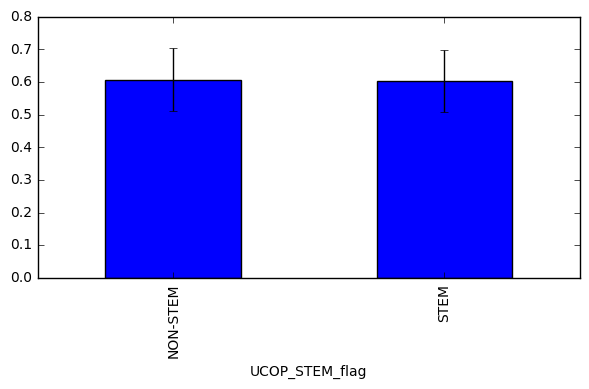


Description masculine words
UCOP_STEM_flag
NON-STEM    1.130573
STEM        1.422604
Name: masc_words_num, dtype: float64
UCOP_STEM_flag
NON-STEM    1.445105
STEM        1.464954
Name: masc_words_num, dtype: float64


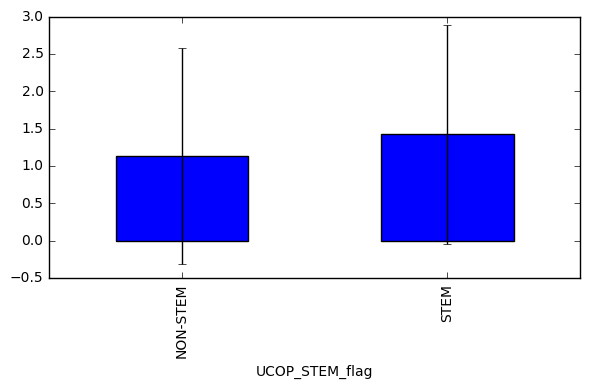


Description masculine words proportion
UCOP_STEM_flag
NON-STEM    0.003252
STEM        0.004826
Name: masc_words_pro, dtype: float64
UCOP_STEM_flag
NON-STEM    0.003763
STEM        0.004885
Name: masc_words_pro, dtype: float64


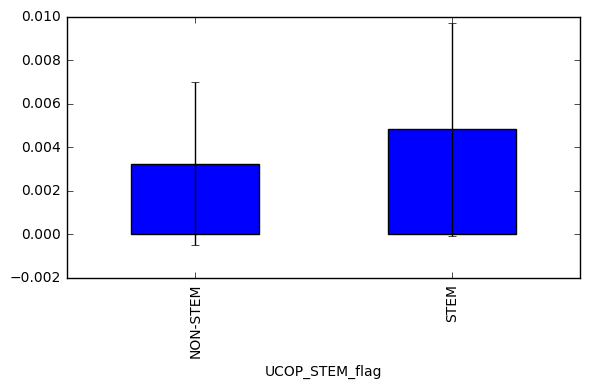


Description feminine words
UCOP_STEM_flag
NON-STEM    2.162420
STEM        1.783784
Name: femi_words_num, dtype: float64
UCOP_STEM_flag
NON-STEM    1.821698
STEM        1.765134
Name: femi_words_num, dtype: float64


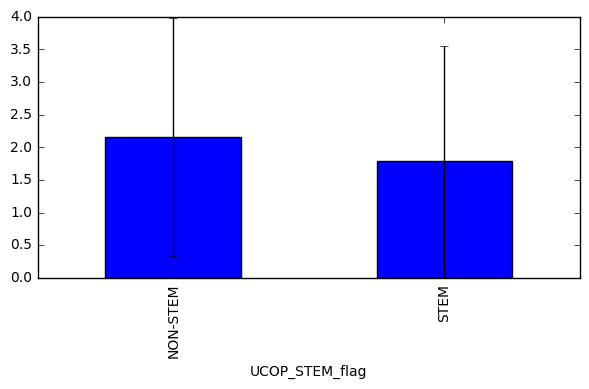


Description feminine words proportion
UCOP_STEM_flag
NON-STEM    0.006947
STEM        0.005991
Name: femi_words_pro, dtype: float64
UCOP_STEM_flag
NON-STEM    0.005395
STEM        0.005724
Name: femi_words_pro, dtype: float64


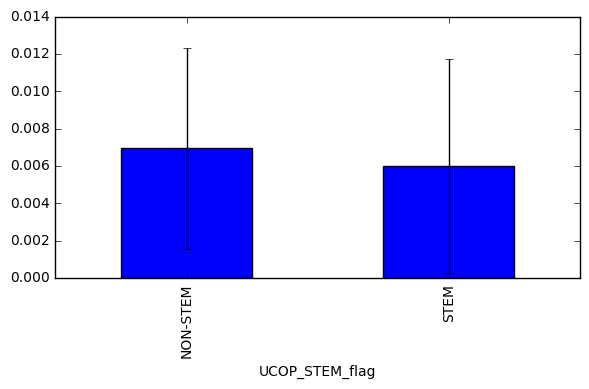

In [5]:
# for UCOP STEM flag

UCOP_group = recruit_data.groupby('UCOP_STEM_flag')
print(UCOP_group.describe())

# combined gendered terms
print()
gendered_word_nums = ['masc_words_num', 'femi_words_num']
print('Description masculine and feminine words')
print(UCOP_group[gendered_word_nums].mean())
print(UCOP_group[gendered_word_nums].std())
UCOP_group[gendered_word_nums].mean().plot(kind = 'bar', yerr = UCOP_group[gendered_word_nums].std())
plt.tight_layout()
plt.savefig('../data/UCOP_gendered_words.png')
plt.show()

# combined gendered proportions
print()
gendered_word_pros = ['masc_words_pro', 'femi_words_pro']
print('Description masculine and feminine proportions')
print(UCOP_group[gendered_word_pros].mean())
print(UCOP_group[gendered_word_pros].std())
UCOP_group[gendered_word_pros].mean().plot(kind = 'bar', yerr = UCOP_group[gendered_word_pros].std())
plt.tight_layout()
plt.savefig('../data/UCOP_gendered_pros.png')
plt.show()

# mean length of job description + var

print()
print('Description length')
print(UCOP_group['descr_length'].mean())
print(UCOP_group['descr_length'].std())
UCOP_group['descr_length'].mean().plot(kind = 'bar', yerr = UCOP_group['descr_length'].std())
plt.tight_layout()
plt.savefig('../data/UCOP_length.png')
plt.show()

# TTR of job descriptions + var

print()
print('Description TTR')
print(UCOP_group['TTR'].mean())
print(UCOP_group['TTR'].std())
UCOP_group['TTR'].mean().plot(kind = 'bar', yerr = UCOP_group['TTR'].std())
plt.tight_layout()
plt.savefig('../data/UCOP_TTR.png')
plt.show()

# mean # of masculine words in job description + var

print()
print('Description masculine words')
print(UCOP_group['masc_words_num'].mean())
print(UCOP_group['masc_words_num'].std())
UCOP_group['masc_words_num'].mean().plot(kind = 'bar', yerr = UCOP_group['masc_words_num'].std())
plt.tight_layout()
plt.savefig('../data/UCOP_masc_words_no.png')
plt.show()

# mean proportion of masculine words in job description + var

print()
print('Description masculine words proportion')
print(UCOP_group['masc_words_pro'].mean())
print(UCOP_group['masc_words_pro'].std())
UCOP_group['masc_words_pro'].mean().plot(kind = 'bar', yerr = UCOP_group['masc_words_pro'].std())
plt.tight_layout()
plt.savefig('../data/UCOP_masc_words_pro.png')
plt.show()

# mean # of feminine words in job description + var

print()
print('Description feminine words')
print(UCOP_group['femi_words_num'].mean())
print(UCOP_group['femi_words_num'].std())
UCOP_group['femi_words_num'].mean().plot(kind = 'bar', yerr = UCOP_group['femi_words_num'].std())
plt.tight_layout()
plt.savefig('../data/UCOP_femi_words_no.png')
plt.show()

# mean proportion of feminine words in job description + var

print()
print('Description feminine words proportion')
print(UCOP_group['femi_words_pro'].mean())
print(UCOP_group['femi_words_pro'].std())
UCOP_group['femi_words_pro'].mean().plot(kind = 'bar', yerr = UCOP_group['femi_words_pro'].std())
plt.tight_layout()
plt.savefig('../data/UCOP_femi_words_pro.png')
plt.show()

# most common 10 masculine words in job descriptions + context
# most common 10 feminine words in job descriptions + context


In [ ]:
#UCOP_femi_words = recruit_data.groupby('UCOP_STEM_flag')['femi_words_found'].apply(list)

#UCOP_stem_fem_cat = []
#for i in range(0, len(list(UCOP_femi_words('STEM'))):
#    UCOP_stem_fem_cat.extend(list(UCOP_stem_fem('STEM')[i]))
#print('10 most frequent feminine words (STEM):', nltk.FreqDist(UCOP_stem_fem_cat).most_common()[:10])

#print(index.UCOP_femi_words)


                            TTR  descr_length  femi_words_num  femi_words_pro  \
CIP_STEM_flag                                                                   
Non-STEM      count  683.000000    683.000000      683.000000      683.000000   
              mean     0.616835    293.035139        2.404100        0.007361   
              std      0.117550    163.147349        2.621384        0.006326   
              min      0.388601      2.000000        0.000000        0.000000   
              25%      0.549604    196.000000        1.000000        0.003170   
              50%      0.593548    291.000000        2.000000        0.006431   
              75%      0.650924    376.000000        3.000000        0.010366   
              max      1.000000   1115.000000       29.000000        0.035714   
STEM          count  415.000000    415.000000      415.000000      415.000000   
              mean     0.593956    309.968675        2.012048        0.005996   
              std      0.096

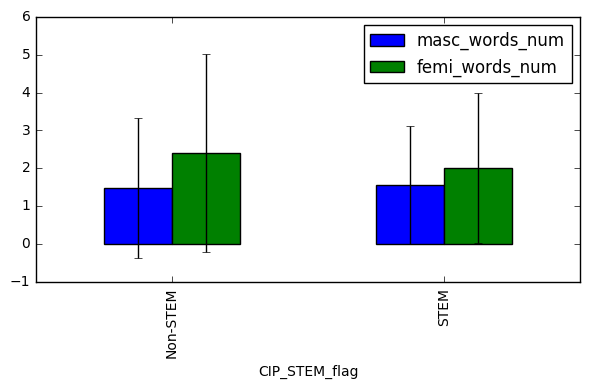


Description masculine and feminine proportions
               masc_words_pro  femi_words_pro
CIP_STEM_flag                                
Non-STEM             0.004536        0.007361
STEM                 0.004786        0.005996
               masc_words_pro  femi_words_pro
CIP_STEM_flag                                
Non-STEM             0.005794        0.006326
STEM                 0.004713        0.005204


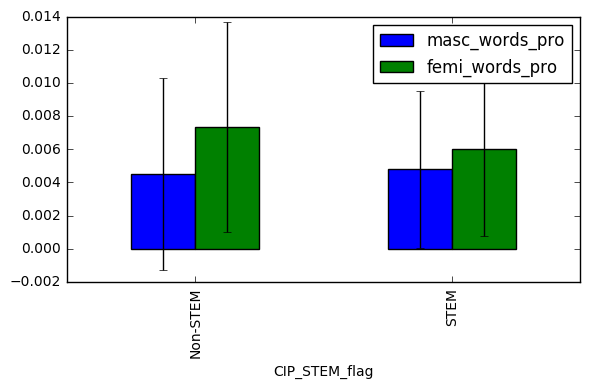


Description length
CIP_STEM_flag
Non-STEM    293.035139
STEM        309.968675
Name: descr_length, dtype: float64
CIP_STEM_flag
Non-STEM    163.147349
STEM        153.092396
Name: descr_length, dtype: float64


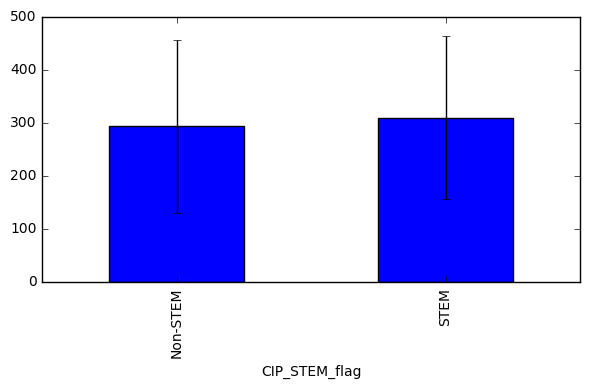


Description TTR
CIP_STEM_flag
Non-STEM    0.616835
STEM        0.593956
Name: TTR, dtype: float64
CIP_STEM_flag
Non-STEM    0.117550
STEM        0.096243
Name: TTR, dtype: float64


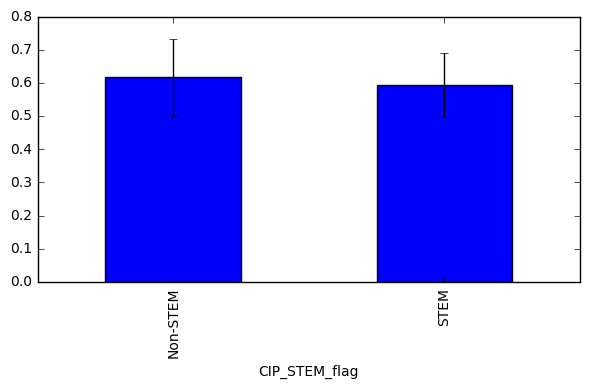


Description masculine words
CIP_STEM_flag
Non-STEM    1.468521
STEM        1.554217
Name: masc_words_num, dtype: float64
CIP_STEM_flag
Non-STEM    1.847592
STEM        1.563881
Name: masc_words_num, dtype: float64


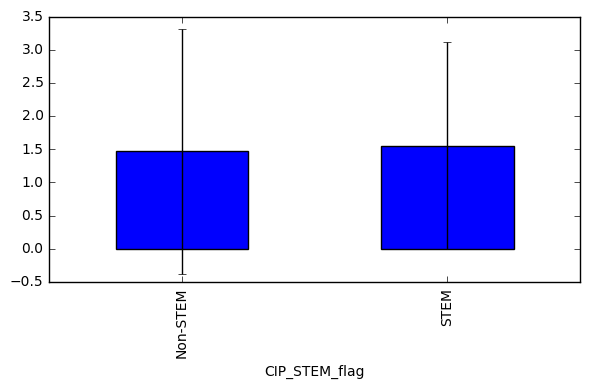


Description masculine words proportion
CIP_STEM_flag
Non-STEM    0.004536
STEM        0.004786
Name: masc_words_pro, dtype: float64
CIP_STEM_flag
Non-STEM    0.005794
STEM        0.004713
Name: masc_words_pro, dtype: float64


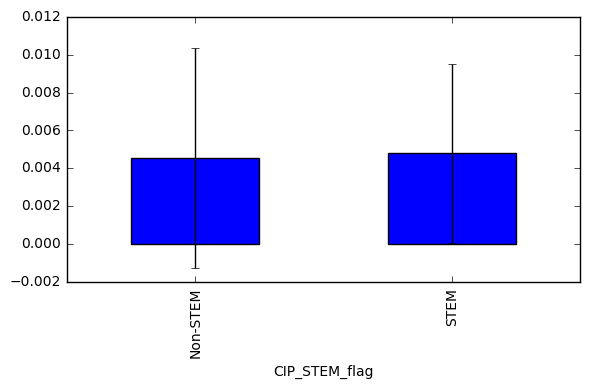


Description feminine words
CIP_STEM_flag
Non-STEM    2.404100
STEM        2.012048
Name: femi_words_num, dtype: float64
CIP_STEM_flag
Non-STEM    2.621384
STEM        1.981155
Name: femi_words_num, dtype: float64


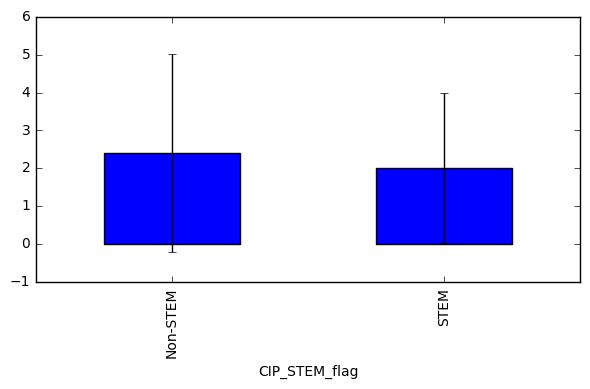


Description feminine words proportion
CIP_STEM_flag
Non-STEM    0.007361
STEM        0.005996
Name: femi_words_pro, dtype: float64
CIP_STEM_flag
Non-STEM    0.006326
STEM        0.005204
Name: femi_words_pro, dtype: float64


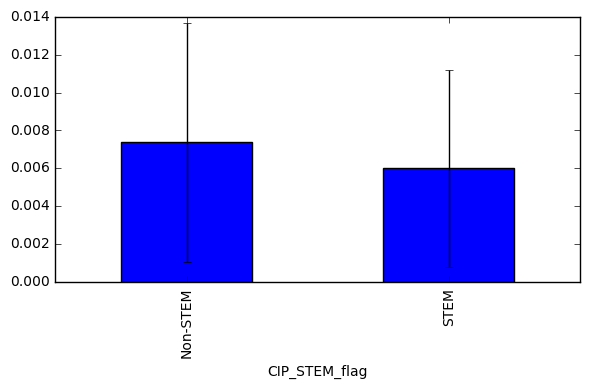

In [6]:
# for CIP STEM flag

CIP_group = recruit_data.groupby('CIP_STEM_flag')
print(CIP_group.describe())

# combined gendered terms
print()
print('Description masculine and feminine words')
print(CIP_group[gendered_word_nums].mean())
print(CIP_group[gendered_word_nums].std())
CIP_group[gendered_word_nums].mean().plot(kind = 'bar', yerr = CIP_group[gendered_word_nums].std())
plt.tight_layout()
plt.savefig('../data/CIP_gendered_words.png')
plt.show()

# combined gendered proportions
print()
print('Description masculine and feminine proportions')
print(CIP_group[gendered_word_pros].mean())
print(CIP_group[gendered_word_pros].std())
CIP_group[gendered_word_pros].mean().plot(kind = 'bar', yerr = CIP_group[gendered_word_pros].std())
plt.tight_layout()
plt.savefig('../data/CIP_gendered_pros.png')
plt.show()

# mean length of job description + var

print()
print('Description length')
print(CIP_group['descr_length'].mean())
print(CIP_group['descr_length'].std())
CIP_group['descr_length'].mean().plot(kind = 'bar', yerr = CIP_group['descr_length'].std())
plt.tight_layout()
plt.savefig('../data/CIP_length.png')
plt.show()

# TTR of job descriptions + var

print()
print('Description TTR')
print(CIP_group['TTR'].mean())
print(CIP_group['TTR'].std())
CIP_group['TTR'].mean().plot(kind = 'bar', yerr = CIP_group['TTR'].std())
plt.tight_layout()
plt.savefig('../data/CIP_TTR.png')
plt.show()

# mean # of masculine words in job description + var

print()
print('Description masculine words')
print(CIP_group['masc_words_num'].mean())
print(CIP_group['masc_words_num'].std())
CIP_group['masc_words_num'].mean().plot(kind = 'bar', yerr = CIP_group['masc_words_num'].std())
plt.tight_layout()
plt.savefig('../data/CIP_masc_words_no.png')
plt.show()

# mean proportion of masculine words in job description + var

print()
print('Description masculine words proportion')
print(CIP_group['masc_words_pro'].mean())
print(CIP_group['masc_words_pro'].std())
CIP_group['masc_words_pro'].mean().plot(kind = 'bar', yerr = CIP_group['masc_words_pro'].std())
plt.tight_layout()
plt.savefig('../data/CIP_masc_words_pro.png')
plt.show()

# mean # of feminine words in job description + var

print()
print('Description feminine words')
print(CIP_group['femi_words_num'].mean())
print(CIP_group['femi_words_num'].std())
CIP_group['femi_words_num'].mean().plot(kind = 'bar', yerr = CIP_group['femi_words_num'].std())
plt.tight_layout()
plt.savefig('../data/CIP_femi_words_no.png')
plt.show()

# mean proportion of feminine words in job description + var

print()
print('Description feminine words proportion')
print(CIP_group['femi_words_pro'].mean())
print(CIP_group['femi_words_pro'].std())
CIP_group['femi_words_pro'].mean().plot(kind = 'bar', yerr = CIP_group['femi_words_pro'].std())
plt.tight_layout()
plt.savefig('../data/CIP_femi_words_pro.png')
plt.show()

# most common 10 masculine words in job descriptions + context
# most common 10 feminine words in job descriptions + context


                                   TTR  descr_length  femi_words_num  \
STEM_SocSci_CIP_flag                                                   
Non-STEM             count  597.000000    597.000000      597.000000   
                     mean     0.612112    303.252931        2.582915   
                     std      0.120001    166.867602        2.726069   
                     min      0.388601      2.000000        0.000000   
                     25%      0.543131    211.000000        1.000000   
                     50%      0.582492    300.000000        2.000000   
                     75%      0.646154    389.000000        3.000000   
                     max      1.000000   1115.000000       29.000000   
STEM                 count  501.000000    501.000000      501.000000   
                     mean     0.603512    294.886228        1.866267   
                     std      0.097889    150.434853        1.887877   
                     min      0.369176      1.000000        0.00

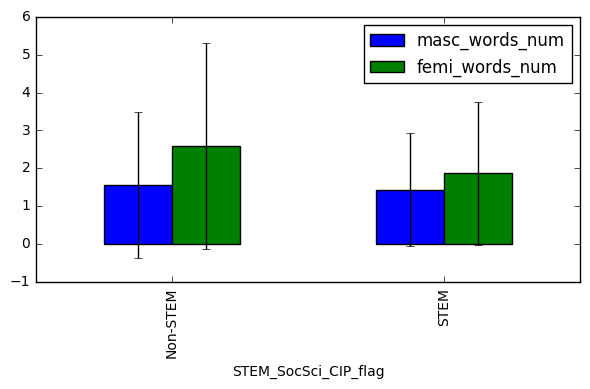


Description masculine and feminine proportions
                      masc_words_pro  femi_words_pro
STEM_SocSci_CIP_flag                                
Non-STEM                    0.004607        0.007486
STEM                        0.004659        0.006081
                      masc_words_pro  femi_words_pro
STEM_SocSci_CIP_flag                                
Non-STEM                    0.005905        0.006006
STEM                        0.004758        0.005822


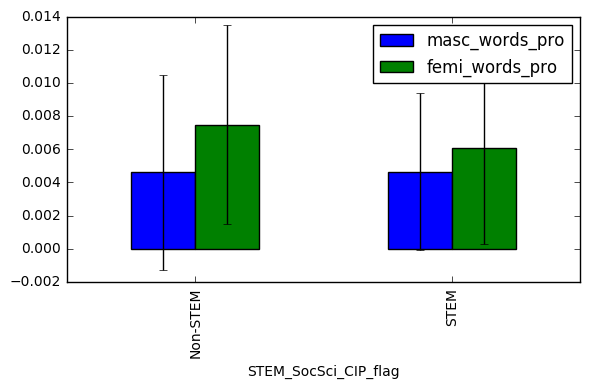


Description length
STEM_SocSci_CIP_flag
Non-STEM    303.252931
STEM        294.886228
Name: descr_length, dtype: float64
STEM_SocSci_CIP_flag
Non-STEM    166.867602
STEM        150.434853
Name: descr_length, dtype: float64


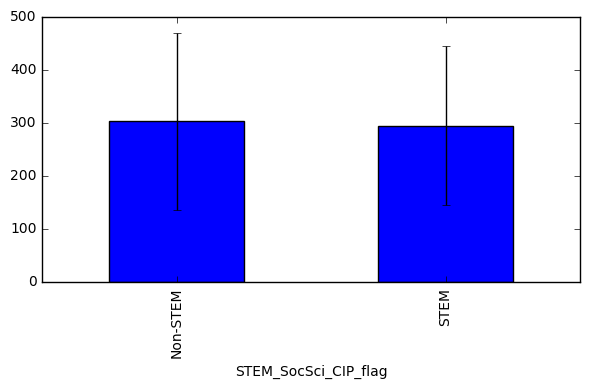


Description TTR
STEM_SocSci_CIP_flag
Non-STEM    0.612112
STEM        0.603512
Name: TTR, dtype: float64
STEM_SocSci_CIP_flag
Non-STEM    0.120001
STEM        0.097889
Name: TTR, dtype: float64


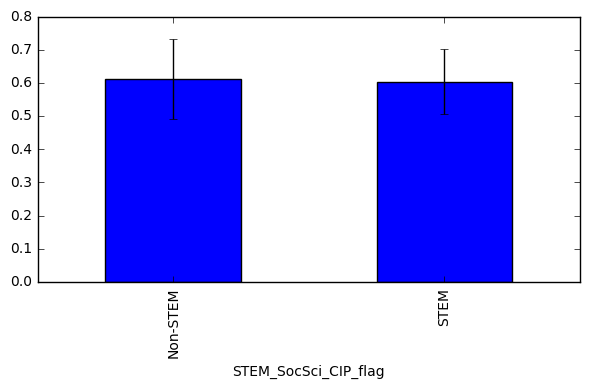


Description masculine words
STEM_SocSci_CIP_flag
Non-STEM    1.561139
STEM        1.429142
Name: masc_words_num, dtype: float64
STEM_SocSci_CIP_flag
Non-STEM    1.933899
STEM        1.489117
Name: masc_words_num, dtype: float64


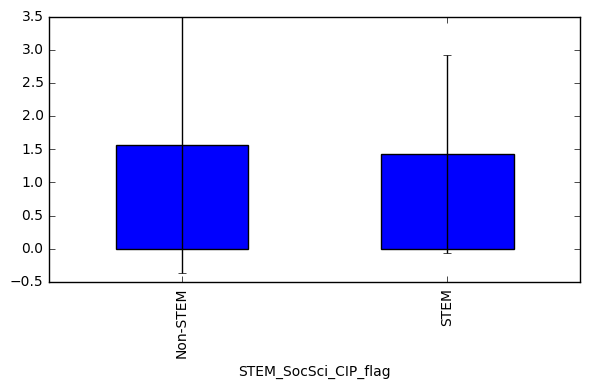


Description masculine words proportion
STEM_SocSci_CIP_flag
Non-STEM    0.004607
STEM        0.004659
Name: masc_words_pro, dtype: float64
STEM_SocSci_CIP_flag
Non-STEM    0.005905
STEM        0.004758
Name: masc_words_pro, dtype: float64


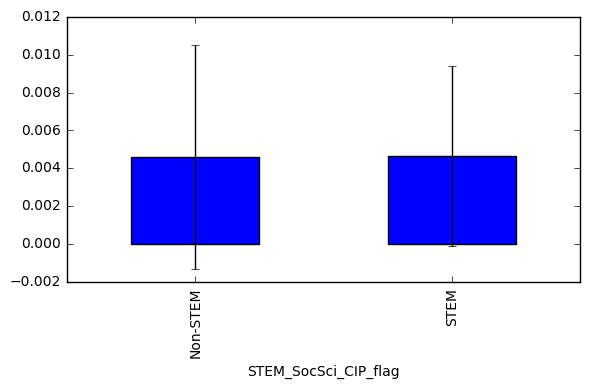


Description feminine words
STEM_SocSci_CIP_flag
Non-STEM    2.582915
STEM        1.866267
Name: femi_words_num, dtype: float64
STEM_SocSci_CIP_flag
Non-STEM    2.726069
STEM        1.887877
Name: femi_words_num, dtype: float64


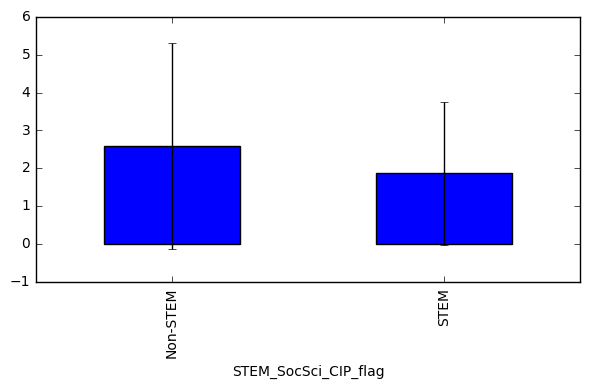


Description feminine words proportion
STEM_SocSci_CIP_flag
Non-STEM    0.007486
STEM        0.006081
Name: femi_words_pro, dtype: float64
STEM_SocSci_CIP_flag
Non-STEM    0.006006
STEM        0.005822
Name: femi_words_pro, dtype: float64


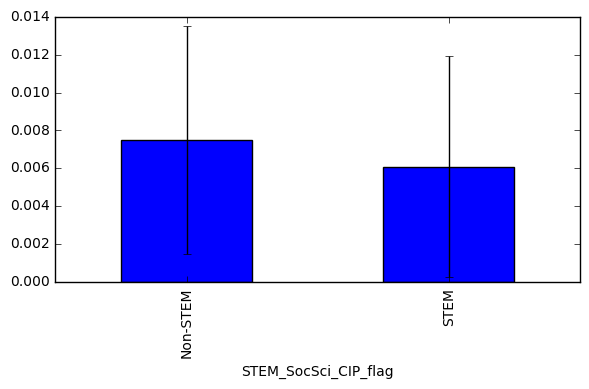

In [7]:
# for CIP + Soc Sci STEM flag

SSCIP_group = recruit_data.groupby('STEM_SocSci_CIP_flag')
print(SSCIP_group.describe())

# combined gendered terms
print()
print('Description masculine and feminine words')
print(SSCIP_group[gendered_word_nums].mean())
print(SSCIP_group[gendered_word_nums].std())
SSCIP_group[gendered_word_nums].mean().plot(kind = 'bar', yerr = SSCIP_group[gendered_word_nums].std())
plt.tight_layout()
plt.savefig('../data/SSCIP_gendered_words.png')
plt.show()

# combined gendered proportions
print()
print('Description masculine and feminine proportions')
print(SSCIP_group[gendered_word_pros].mean())
print(SSCIP_group[gendered_word_pros].std())
SSCIP_group[gendered_word_pros].mean().plot(kind = 'bar', yerr = SSCIP_group[gendered_word_pros].std())
plt.tight_layout()
plt.savefig('../data/SSCIP_gendered_pros.png')
plt.show()

# mean length of job description + var

print()
print('Description length')
print(SSCIP_group['descr_length'].mean())
print(SSCIP_group['descr_length'].std())
SSCIP_group['descr_length'].mean().plot(kind = 'bar', yerr = SSCIP_group['descr_length'].std())
plt.tight_layout()
plt.savefig('../data/SSCIP_length.png')
plt.show()

# TTR of job descriptions + var

print()
print('Description TTR')
print(SSCIP_group['TTR'].mean())
print(SSCIP_group['TTR'].std())
SSCIP_group['TTR'].mean().plot(kind = 'bar', yerr = SSCIP_group['TTR'].std())
plt.tight_layout()
plt.savefig('../data/SSCIP_TTR.png')
plt.show()

# mean # of masculine words in job description + var

print()
print('Description masculine words')
print(SSCIP_group['masc_words_num'].mean())
print(SSCIP_group['masc_words_num'].std())
SSCIP_group['masc_words_num'].mean().plot(kind = 'bar', yerr = SSCIP_group['masc_words_num'].std())
plt.tight_layout()
plt.savefig('../data/SSCIP_masc_words_no.png')
plt.show()

# mean proportion of masculine words in job description + var

print()
print('Description masculine words proportion')
print(SSCIP_group['masc_words_pro'].mean())
print(SSCIP_group['masc_words_pro'].std())
SSCIP_group['masc_words_pro'].mean().plot(kind = 'bar', yerr = SSCIP_group['masc_words_pro'].std())
plt.tight_layout()
plt.savefig('../data/SSCIP_masc_words_pro.png')
plt.show()

# mean # of feminine words in job description + var

print()
print('Description feminine words')
print(SSCIP_group['femi_words_num'].mean())
print(SSCIP_group['femi_words_num'].std())
SSCIP_group['femi_words_num'].mean().plot(kind = 'bar', yerr = SSCIP_group['femi_words_num'].std())
plt.tight_layout()
plt.savefig('../data/SSCIP_femi_words_no.png')
plt.show()

# mean proportion of feminine words in job description + var

print()
print('Description feminine words proportion')
print(SSCIP_group['femi_words_pro'].mean())
print(SSCIP_group['femi_words_pro'].std())
SSCIP_group['femi_words_pro'].mean().plot(kind = 'bar', yerr = SSCIP_group['femi_words_pro'].std())
plt.tight_layout()
plt.savefig('../data/SSCIP_femi_words_pro.png')
plt.show()

# most common 10 masculine words in job descriptions + context
# most common 10 feminine words in job descriptions + context


In [ ]:
# re-do the above with number of words above some threshold?

recruit_data['recruit_large'] = recruit_data.descr_length >= 40
recruit_large_group = recruit_data.groupby('recruit_large')
print(recruit_large_group.describe())

In [ ]:
#scratchpad

#word_list = ['apple', 'banana', 'carrot', 'application']
#word_stem = ['app', 'ban']

#result_list = []

#for r in range (0, len(word_stem)):
#    new_result = [i for i in word_list if i.startswith(word_stem[r])]
#    result_list.extend(new_result)

#print(result_list)

#recruit_data['masc_stems'] = recruit_data['descr_analysis'].apply(lambda x: [word for word in x if word.startswith(masculine_stems[2])])

#for r in range (0, len(word_stem)):
#    new_result = [i for i in word_list if i.startswith(word_stem[r])]
#    result_list.extend(new_result)
#recruit_data['masc_words_found'] = recruit_data['masc_words'] + recruit_data['masc_stems']

